# FordGoBike_DataVisualization
This is an exploraton of the the FordGoBike dataset from San Francisco in 2018.   
Analysis and Visualization: Liz Herdter  
March 2019

**Objective**: Use visualizations to gain insight about trends in rider usage. Specifically identify when and where rider usage is highest and identify possible locations for additional bikes (or removal of stations). 

1. Perform any necessary wrangling  
2. Expore the dataset visually
3. Gain insight about trends in rider usage

**About the Data**  
Ford GoBike is a bike share system in the San Francisco Bay Area. This program was piloted in 2013 and as of 2018 there were 7000 bikes in the Ford GoBike fleet spread across the Bay Area, East Bay, and San Jose. The bikes are locked into a network of docking stations around the city. They can be unlocked from one station and returned to any other station making them ideal for one way trips. The bike are accessible 24/7/365. More about this program is can be accessed [here](https://www.fordgobike.com/about). 

Sources used:  
https://stackoverflow.com/questions/41514173/change-multiple-columns-in-pandas-dataframe-to-datetime  
https://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not/33757291  
https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date-in-python

In [260]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

In [2]:
#define path for data within in Jupyter Notebook
path = r'Data/'
all_files = glob.glob(path + "/*.csv")

# Join all dataframes together 
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
#explore shape and features within dataset
df.shape

(1863721, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [5]:
df.head()

duration_sec                start_time                  end_time  \
0           598  2018-02-28 23:59:47.0970  2018-03-01 00:09:45.1870   
1           943  2018-02-28 23:21:16.4950  2018-02-28 23:36:59.9740   
2         18587  2018-02-28 18:20:55.1900  2018-02-28 23:30:42.9250   
3         18558  2018-02-28 18:20:53.6210  2018-02-28 23:30:12.4500   
4           885  2018-02-28 23:15:12.8580  2018-02-28 23:29:58.6080   

   start_station_id                                 start_station_name  \
0             284.0  Yerba Buena Center for the Arts (Howard St at ...   
1               6.0                      The Embarcadero at Sansome St   
2              93.0                       4th St at Mission Bay Blvd S   
3              93.0                       4th St at Mission Bay Blvd S   
4             308.0                                   San Pedro Square   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.784872              -122.400876           114.0   
1               37.804770              -122.403234           324.0   
2               37.770407              -122.391198            15.0   
3               37.770407              -122.391198            15.0   
4               37.336802              -121.894090           297.0   

                                    end_station_name  end_station_latitude  \
0                         Rhode Island St at 17th St             37.764478   
1                Union Square (Powell St at Post St)             37.788300   
2  San Francisco Ferry Building (Harry Bridges Pl...             37.795392   
3  San Francisco Ferry Building (Harry Bridges Pl...             37.795392   
4                              Locust St at Grant St             37.322980   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402570     1035  Subscriber             1988.0   
1            -122.408531     1673    Customer             1987.0   
2            -122.394203     3498    Customer             1986.0   
3            -122.394203     3129    Customer             1981.0   
4            -121.887931     1839  Subscriber             1976.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1          Male                      No  
2        Female                      No  
3          Male                      No  
4        Female                     Yes

In [6]:
df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Structure of the dataset

This dataset has 16 features and nearly 2 million records. Each record corresponds to a single trip made. Features incluce duration of the ride, start time, end time, start station, start station name, start station lat and long, end station, end station name, end station lat and long, bike id, user type, member birth year, and member gender. 

### Main features of interest

This dataset can be used to explore the total number of rides at an hourly, daily, weekly, and monthly temporal resolution. It can also be used to learn about peak rides from each station. Other interesting features included the interaction between number of rides made in each hour based on the day as well as average duration across hours in each day. Additionally, this dataset will provide information about what stations are most traveled too and from and identify areas where more bikes might be used or target spatial areas for new bikeshare stations. 


### Features to support investigation

This dataset contains a wealth of information that can be used to explore rider patterns. Specific features include duration_sec, start time, end time, start station id, end station id, and user_type. There are some missing records for start and end station id but we can fill these in using stations that match the same start and end station lat for the missing ones. Age of rides (member_birth_year) may also be informative but ~5% of the records are missing information for this feature, most likely because only a portion of the users are members. 





## Perform necessary wrangling

**Quality Issues**
1. Start_time and end_time as type objects
2. start and end station id as type ints 
3. Bike id is int
4. Member birth year is int
5. Missing values for start and end station. 
**Structural Issues**  
Technically speaking, this dataset is quite tidy as it is but in order to explore rider preference on a temporal and spatial scale new features will be needed based on the start and end time. Duration will need to be converted and binned. 

>start time
1. new column for hour
2. new column for day 
3. new column for month 
4. new column for day of week

>end time
1. new column for hour
2. new column for day 
3. new column for month 
4. new column for day of week


> duration
1. convert to minutes
2. cut bins 

**Deal with quality issues first**

In [8]:
df1 = df.copy()

1. Change start and end time to type datetime

In [9]:
df1[['start_time', 'end_time']]=df1[['start_time', 'end_time']].apply(pd.to_datetime)

2-4. Change start and end station id from float to string.  bike id, and member_birthyear to type object.

In [10]:
#df1[['start_station_id', 'end_station_id', 'bike_id', "member_birth_year"]]=df1[['start_station_id', 'end_station_id', 'bike_id', 'member_birth_year']].astype('str')
df1[['start_station_id', 'end_station_id']]=df1[['start_station_id', 'end_station_id']].fillna(0).astype(int)
df1[['start_station_id', 'end_station_id']]=df1[['start_station_id', 'end_station_id']].fillna(0).astype(str)



In [11]:
df1[['bike_id', "member_birth_year"]]=df1[['bike_id', 'member_birth_year']].astype('str')



In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
member_birth_year          object
member_gender              object
bike_share_for_all_trip    object
dtypes: datetime64[ns](2), float64(4), int64(1), object(9)
memory usage: 227.5+ MB


5. Explore missing values for start and end station id 

In [60]:
#get unique lat longs to see which bikes are not recording station 
lat_long = df1.drop_duplicates(subset= ['start_station_latitude', 'start_station_longitude'])
lat_long.sample(5)

duration_sec              start_time                end_time  \
315              278 2018-02-28 19:51:24.334 2018-02-28 19:56:03.297   
112298           335 2018-11-30 06:42:41.154 2018-11-30 06:48:16.342   
478040           816 2018-06-23 13:45:35.985 2018-06-23 13:59:12.384   
106745           905 2018-11-30 23:29:52.456 2018-11-30 23:44:58.094   
106748           369 2018-11-30 23:36:17.314 2018-11-30 23:42:27.248   

       start_station_id           start_station_name  start_station_latitude  \
315                 336  Potrero Ave and Mariposa St               37.763281   
112298              271               San Pablo Park               37.855783   
478040              NaN                          NaN               37.390000   
106745              371   Lombard St at Columbus Ave               37.802746   
106748              370          Jones St at Post St               37.787327   

        start_station_longitude end_station_id  \
315                 -122.407377            124   
112298              -122.283127            265   
478040              -121.960000            NaN   
106745              -122.413579             17   
106748              -122.413278             19   

                                        end_station_name  \
315                                19th St at Florida St   
112298                             Ninth St at Parker St   
478040                                               NaN   
106745  Embarcadero BART Station (Beale St at Market St)   
106748                              Post St at Kearny St   

        end_station_latitude  end_station_longitude bike_id   user_type  \
315                37.760447            -122.410807    3016  Subscriber   
112298             37.858868            -122.291209    3597  Subscriber   
478040             37.380000            -121.940000    4240  Subscriber   
106745             37.792251            -122.397086    2464  Subscriber   
106748             37.788975            -122.403452    2752  Subscriber   

       member_birth_year member_gender bike_share_for_all_trip  
315                 1984          Male                      No  
112298              1966          Male                      No  
478040              1987          Male                      No  
106745              1977          Male                      No  
106748              1992          Male                      No

In [61]:
#which bikes are not recording
lat_long[lat_long.start_station_id.isna()].bike_id.value_counts()

4102    7
4147    3
4281    3
4250    3
4184    3
4289    2
4163    2
4165    2
4259    2
4127    2
4095    2
4105    2
4240    2
4099    2
4238    2
4111    2
4181    2
4193    2
4254    1
4144    1
4257    1
4243    1
4247    1
3975    1
4260    1
4263    1
4136    1
4425    1
4140    1
4270    1
4245    1
3769    1
4276    1
4120    1
4288    1
4110    1
4207    1
4132    1
4122    1
4202    1
4201    1
4196    1
4190    1
4185    1
4277    1
4179    1
4171    1
4297    1
4168    1
4295    1
4160    1
4284    1
4155    1
3758    1
4097    1
Name: bike_id, dtype: int64

In [162]:
#test
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 26 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
member_birth_year          object
member_gender              object
bike_share_for_all_trip    object
start_hour                 int64
start_day                  int64
start_month                int64
start_weekday              int64
end_hour                   int64
end_day                    int64
end_month                  int64
end_weekday                int64
duration_mins              float64
duration_hours           

**Now deal with structural items**

In [13]:
#start time
#1. new column for hour
#2. new column for day 
#3. new column for month 
#4. new column for day of week

df1['start_hour'] = df1.start_time.dt.hour
df1['start_day'] = df1.start_time.dt.day
df1['start_month'] = df1.start_time.dt.month
df1['start_weekday'] = df1.start_time.dt.weekday


df1['end_hour'] = df1.end_time.dt.hour
df1['end_day'] = df1.end_time.dt.day
df1['end_month'] = df1.end_time.dt.month
df1['end_weekday'] = df1.start_time.dt.weekday

In [ ]:
# duration
#1. convert to minutes
#2. cut bins 

In [14]:
df1['duration_mins'] = df1.duration_sec/60
df1['duration_hours']=df1.duration_sec/3600


In [15]:
#cut bins
bins = np.arange(0, int(df1.duration_hours.max()+0.1)+1, 1)
bins

df1['duration_hours'] = pd.cut(df1['duration_hours'], bins)

In [16]:
#check to see it worked
df1.loc[:, ['duration_sec', 'duration_mins', 'duration_hours']].sample(10)

duration_sec  duration_mins duration_hours
1097429           370       6.166667         (0, 1]
1310668           349       5.816667         (0, 1]
715430            655      10.916667         (0, 1]
371666            568       9.466667         (0, 1]
856849            222       3.700000         (0, 1]
45889             274       4.566667         (0, 1]
144156            488       8.133333         (0, 1]
992027            570       9.500000         (0, 1]
84460             322       5.366667         (0, 1]
1591409           466       7.766667         (0, 1]

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

**Univariate:**
1. How many rides for each hour
2. How many rides for each month
3. How many rides on day of week 
4. How many rides from each start station
5. How many rides to each end station
6. Distribution of duration



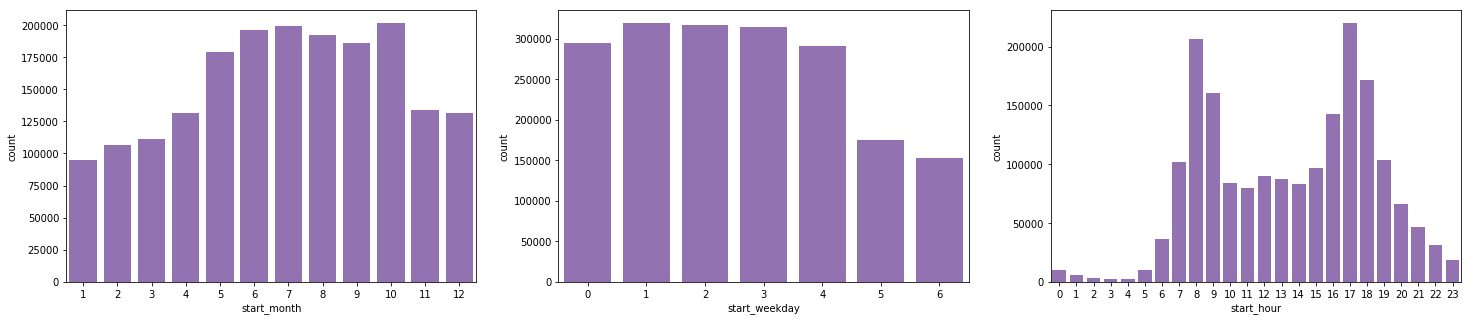

In [220]:
plt.figure(figsize =[25,5])

color=sb.color_palette()[4]

#explore total rides by start month
plt.subplot(1,3,1)
sb.countplot(data=df1, x='start_month',color=color)

#explore total rides by start weekday
plt.subplot(1,3,2)
sb.countplot(data=df1, x ='start_weekday', color=color)

#explore total rides by start hour
plt.subplot(1,3,3)
sb.countplot(data=df1, x ='start_hour', color=color)


**Preliminary Take Aways**
1. Total rides are variable over months with greater total rides occuring during the summer months (June - October). In September total rides decline a bit (likely because of the hot weather) and then peak back in October when fall comes and the weather is much nicer.

2. Total rides by duration clearly follow a log-normal distribution as evident by the very right skewed distribution. I will explore the duration distribution in below cells. 

3. Additionally, there are more frequent rides occuring during the week (0-4; Monday - Friday) as opposed to during the weekend (5-6; Saturday - Sunday). 

4. It is also apparent that the bike share is being used quite a bit by commuters as the total rides peak during commuting hours between 7-9 AM and then between 4- 7 PM. 

**Next Steps**  
I am interested in taking a deeper dive into how weekday and start hour interact. I suspect that the patterns on the weekend will be a bit different. 

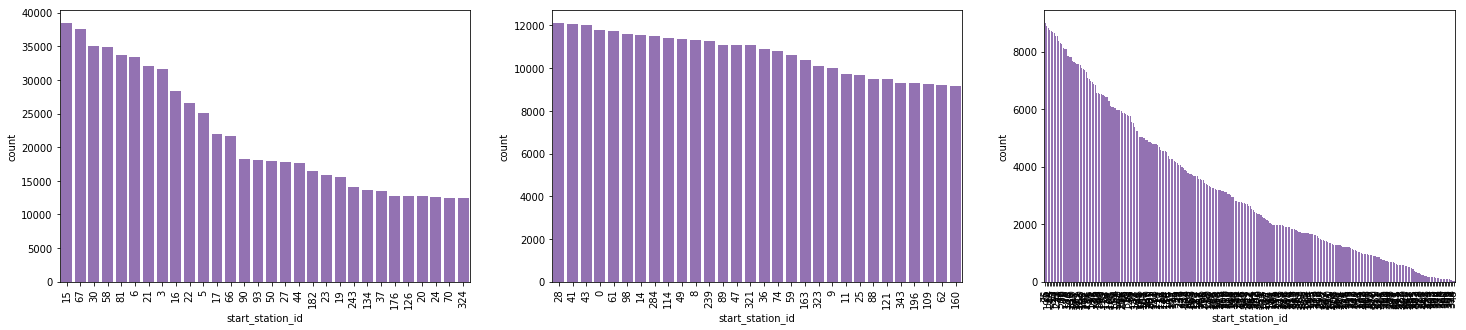

In [221]:
#explore total rides by starting station
plt.figure(figsize =[25,5])

order = df1.start_station_id.value_counts().index[0:30]
plt.subplot(1,3,1)
sb.countplot(data=df1[df1['start_station_id'].isin(order)], x='start_station_id', order= order, color=color)
plt.xticks(rotation=90);


plt.subplot(1,3,2)
order1 = df1.start_station_id.value_counts().index[31:61]
sb.countplot(data=df1[df1['start_station_id'].isin(order1)], x='start_station_id', order= order1, color=color)
plt.xticks(rotation=90);

plt.subplot(1,3,3)
order2 = df1.start_station_id.value_counts().index[62:]
sb.countplot(data=df1[df1['start_station_id'].isin(order2)], x='start_station_id', order= order2, color=color)
plt.xticks(rotation=90);

**Preliminary Take Aways**

>Start Station
1. There are a select amount of stations that are used frequently. Here they are stations 15,67,30,58,81,6,21,3,16,22,5,17,66. There are many other stations that are used a moderate amount (center plot)
2. There are many stations that are used far fewer times throughout the year. 

**Next Steps**  
I am interested in taking a deeper dive into station usage by hour or day to identify high priority stations. Also, it may be useful to identify the frequently unused stations. When are they frequently unused?  

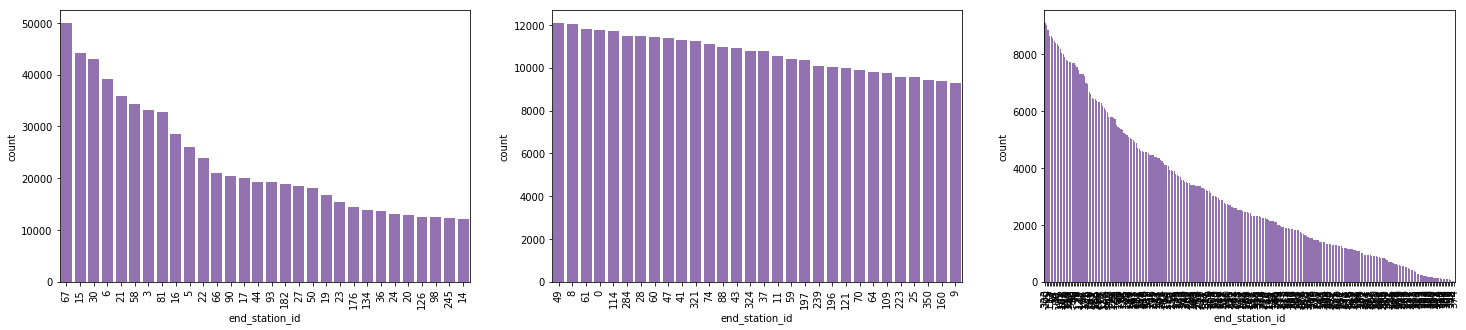

In [222]:
#explore total rides by ending station
plt.figure(figsize =[25,5])

order = df1.end_station_id.value_counts().index[0:30]
plt.subplot(1,3,1)
sb.countplot(data=df1[df1['end_station_id'].isin(order)], x='end_station_id', order= order, color=color)
plt.xticks(rotation=90);


plt.subplot(1,3,2)
order1 = df1.end_station_id.value_counts().index[31:61]
sb.countplot(data=df1[df1['end_station_id'].isin(order1)], x='end_station_id', order= order1, color=color)
plt.xticks(rotation=90);

plt.subplot(1,3,3)
order2 = df1.end_station_id.value_counts().index[62:]
sb.countplot(data=df1[df1['end_station_id'].isin(order2)], x='end_station_id', order= order2, color=color)
plt.xticks(rotation=90);

**Preliminary Take Aways**

>End Station
1. Here it appears that station 67 and 15 are frequently used as ending stations as well as 30,4,21,58, 3, and 81.
2. As with start station there are many stations that are used quite a bit as ending stations and many stations that are used very infrequently

**Next Steps**  
I am interested in taking a deeper dive into station usage by hour or day to identify high priority ending locations. Also, it may be useful to identify the frequently unused stations. When are they frequently unused? 

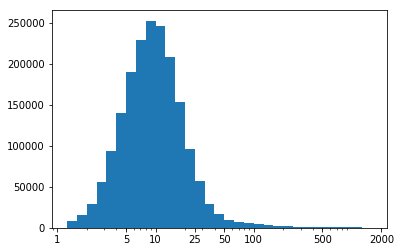

In [21]:
#explore distribution of ride duration
bin_edges = 10**np.arange(0.1, np.log10(df1.duration_mins.max())+0.1, 0.1)

plt.hist(df1['duration_mins'], bins = bin_edges)
plt.xscale('log')

tick_locs = [1,5,10,25, 50,100,500,2000]
plt.xticks(tick_locs, tick_locs);


**Preliminary Take Aways**

> Duration 
1. Duration is log distributed and this figure reflects some axis transformation that I did to better display the data. Average duration over the entire dataset is around 10 minutes. There were a handful of bikes that were checked out for an entire day, although there are so few of these that these are just outliers. 

**Next Steps**  
May be interesting to see if average duration changes much by month, day, or start hour. 

## Bivariate Exploration

Bivariate relationships that I am interested in exploring include the relationship between duration and month, day of the week, and starting hour. As well, I'm interested in the number of rides per hour by month and by weekday. Further, it may be interesting to explore rides per station by month. Finally, I'd like to explore rider rates for user_type.

**Bivariate**
1. Average duration vs month
2. Average duration vs day of week 
3. Average duration vs starting hour 

4. Number of rides per hour by month
5. Number of rides per hour by weekday

6. Number of rides per station by month (Top 50 Stations, Lowest Stations)
7. Number of rides per station by week day (Top 50 Stations, Lowest Stations)
8. Number of rides per station by start hour 

9. Rider rates for user type. 

### Ride Duration

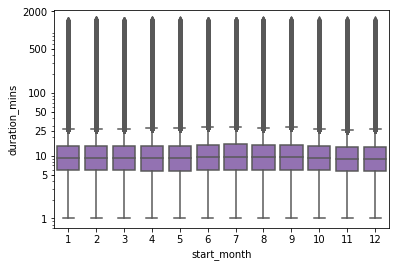

In [223]:
#1. explore average duration by start month
ticks = [1,5,10,25, 50,100,500,2000]

g = sb.boxplot(data=df1, x='start_month', y='duration_mins', color=color)
g.set(yscale='log')
g.set(yticks = ticks)
g.set_yticklabels(ticks);

**Preliminary Take Aways**

> Duration by start month
1. Average ride duration was consistent across starting months. Average ride duration was 10 minutes across all months in 2018. 

**Next Steps**  
Explore average duration by weekday and by hour and also eventually by user type.

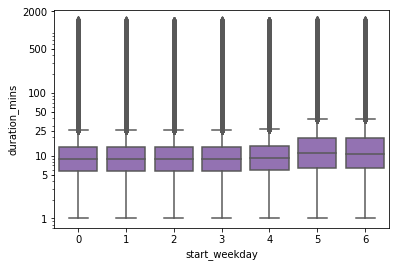

In [224]:
#2. explore average duration by start weekday
ticks = [1,5,10,25, 50,100,500,2000]

g = sb.boxplot(data=df1, x='start_weekday', y='duration_mins', color=color)
g.set(yscale='log')
g.set(yticks = ticks)
g.set_yticklabels(ticks);

**Preliminary Take Aways**

> Duration by start weekday
1. Average ride duration was consistent across working week days (0-4). Ride duration increases slightly on the weekend (5-6), perhaps because people are more leisurely with their rides on the weekends.   

**Next Steps**  
Explore average duration by hour and the interaction between start hour and weekday (0-6). 

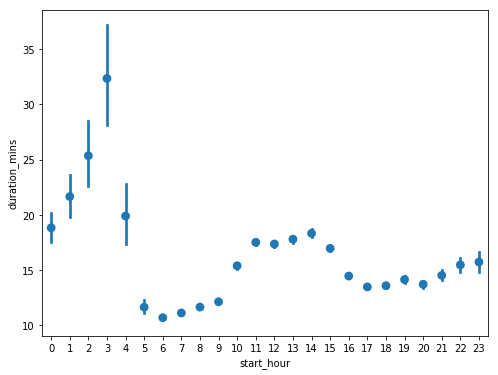

In [31]:
#3. Average duraton by start hour
fig = plt.figure(figsize = [8,6])
g= sb.pointplot(data=df1, x='start_hour', y='duration_mins', linestyles = '')


**Preliminary Take Aways**

> Duration by start hour

1. Here I chose not to view averge ride duration on a log scale because I'm just interested in the mean duration as opposed to the distribution. Ride duration peaks around 3 AM which is interesting considering the fact that many bars seems to close around this time. Perhaps people are using the bikes as opposed to driving? Duration during commuting times (6AM-9AM) is consistently around 10 minutes. Average duration during time time increases. 

**Next Steps**  
Multivariate exploration of ride duration by start hour and weekday to explore the notion that people may be more leisurely with their rides on the weekend or on the weekends when they may be out taking part in nightlife. This may help explain the greater variability in ride time during the early morning hours.  

### Hourly Ride Count

/Users/elizabethherdter/anaconda3/lib/python2.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


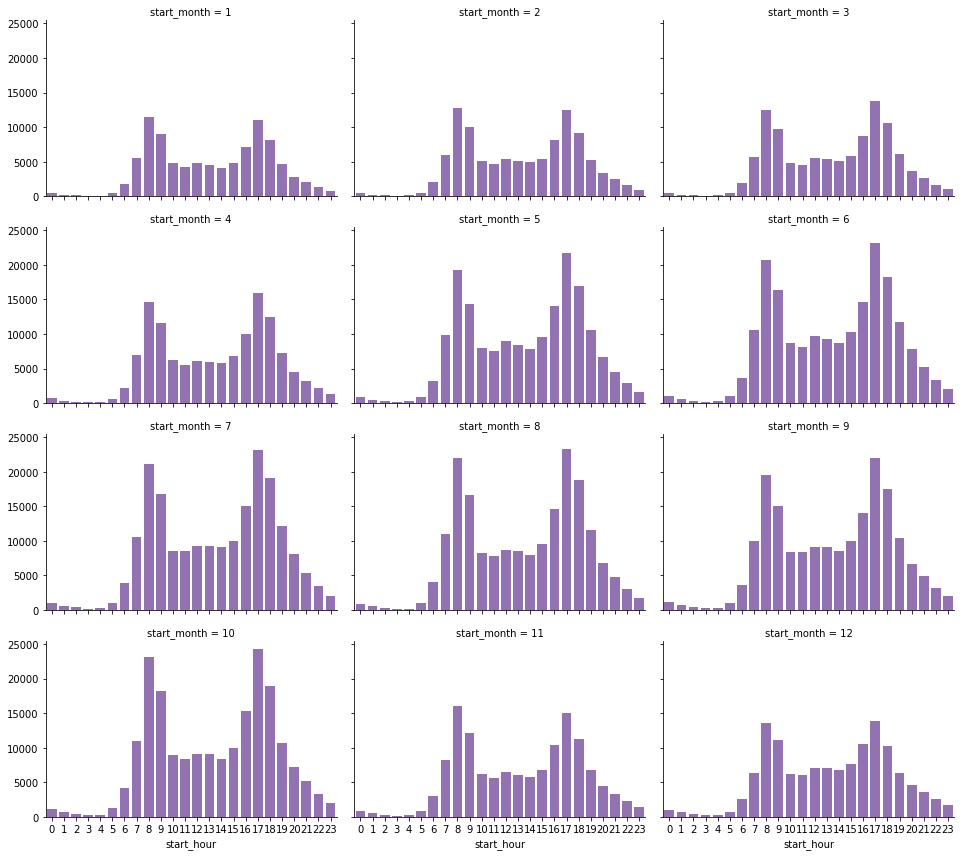

In [234]:
#4. number of rides per hour by month
g = sb.FacetGrid(data=df1, col='start_month', col_wrap=3, aspect=1.5)
g.map(sb.countplot, 'start_hour', color=color)

**Preliminary Take Aways**

> Total rides by start hour over month
1. Total rides by start hour follow a similar pattern over each month. Total rides peak during commuting hours. Overall total rides decline in the winter months and peak during the summer months.   

**Next Steps**  
Explore the number of rides per hour by weekday to see if there is more variability. 

/Users/elizabethherdter/anaconda3/lib/python2.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


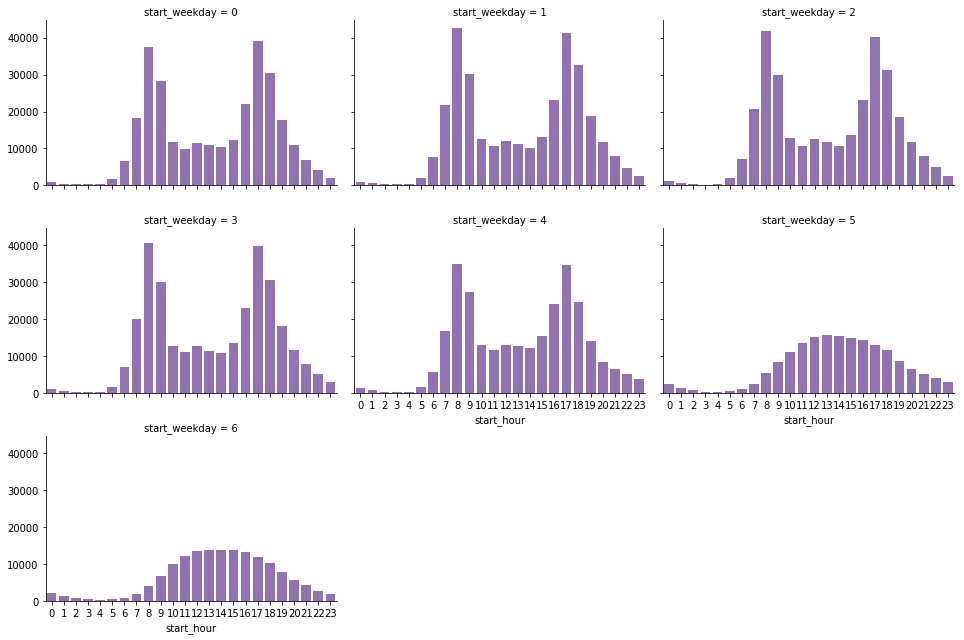

In [233]:
#5.number of rides per hour by weekday
g = sb.FacetGrid(data=df1, col='start_weekday', col_wrap=3, aspect=1.5)
g.map(sb.countplot, 'start_hour', color=color)

**Preliminary Take Aways**

> Total rides by start hour over weekday
1. Total rides by start hour follow a similar pattern during the work week but clearly there is a difference
on the weekends when the peak rides occur during lunch time. This figure displays the dependence of commuters on this ride share system. Total ride counts during the week at any one point in time during commuting hours are between 30,000 and 40,000 whereas on the weekends ridership rates drop drastically. Total rider rates peak only around 15,000. 

**Next Steps:** I'd be interested to see how ridership varies with user type. Are subscribers contributing primarily to this pattern during the weekdays? Are the guests using the bikes only on the weekends? 

### Station Ride Rate - Top 50 stations


In [32]:
#6. number of rides per station by month
#first select the top 50 stations to make the visuals better
top50stations= df1.start_station_id.value_counts().index[:50]

/Users/elizabethherdter/anaconda3/lib/python2.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1800x360 with 0 Axes>

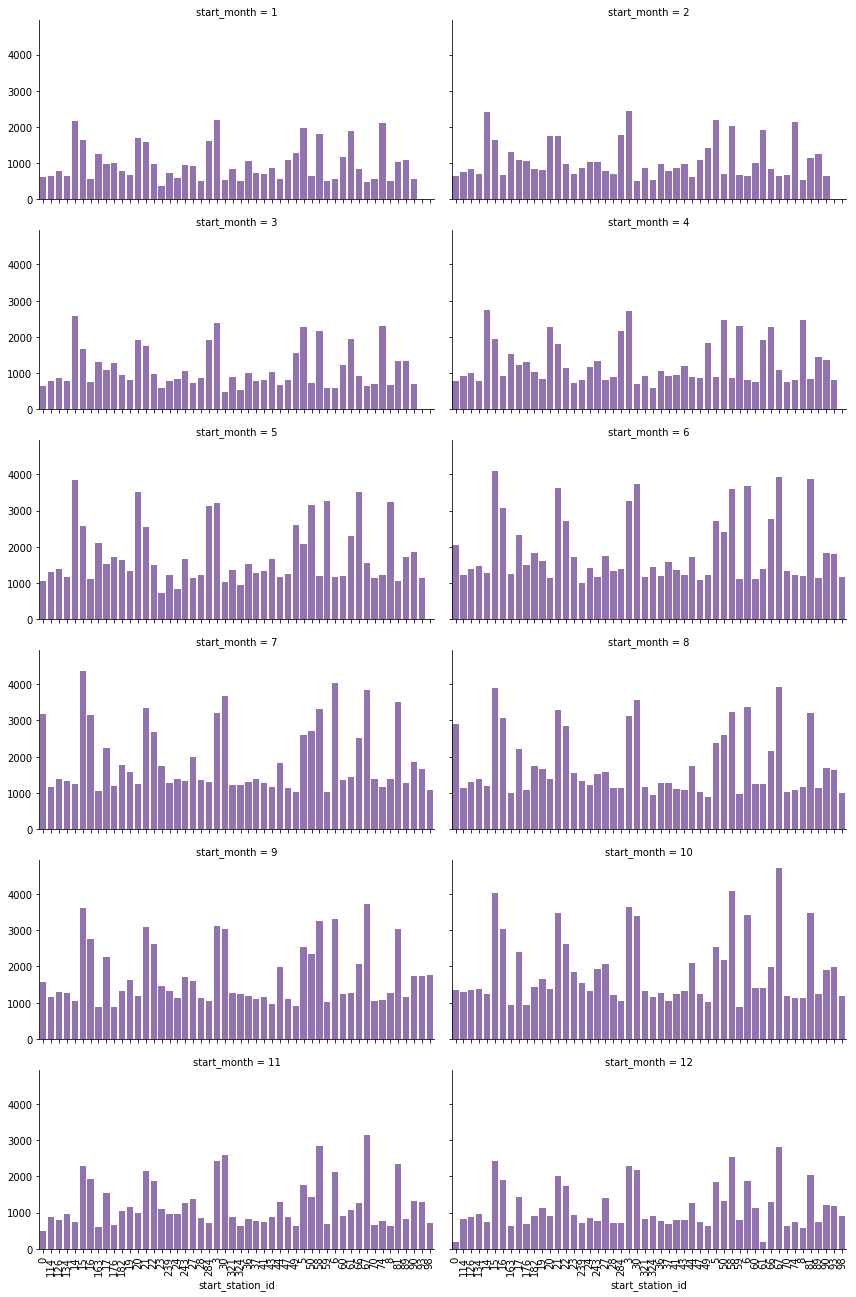

In [244]:
plt.figure(figsize=[25,5])
g = sb.FacetGrid(data=df1[df1['start_station_id'].isin(top50stations)], col='start_month', col_wrap=2, aspect=2)
g.map(sb.countplot, 'start_station_id', color=color)
g.set_xticklabels(rotation=90)

**Preliminary Take Aways**

> Rides by station over start month
1. There is temporal variability in total rides per station, as previous figures also indicate. Generally though, the relative usage pattern among these top 50 stations remains relatively constant throughout the year excpet for perhaps in December and January when many people may be away from work do to many religious holidays.  

**Next Steps:**
Explore the number of rides per station by weekday to see if station usage is affected by commuters. 



/Users/elizabethherdter/anaconda3/lib/python2.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1800x360 with 0 Axes>

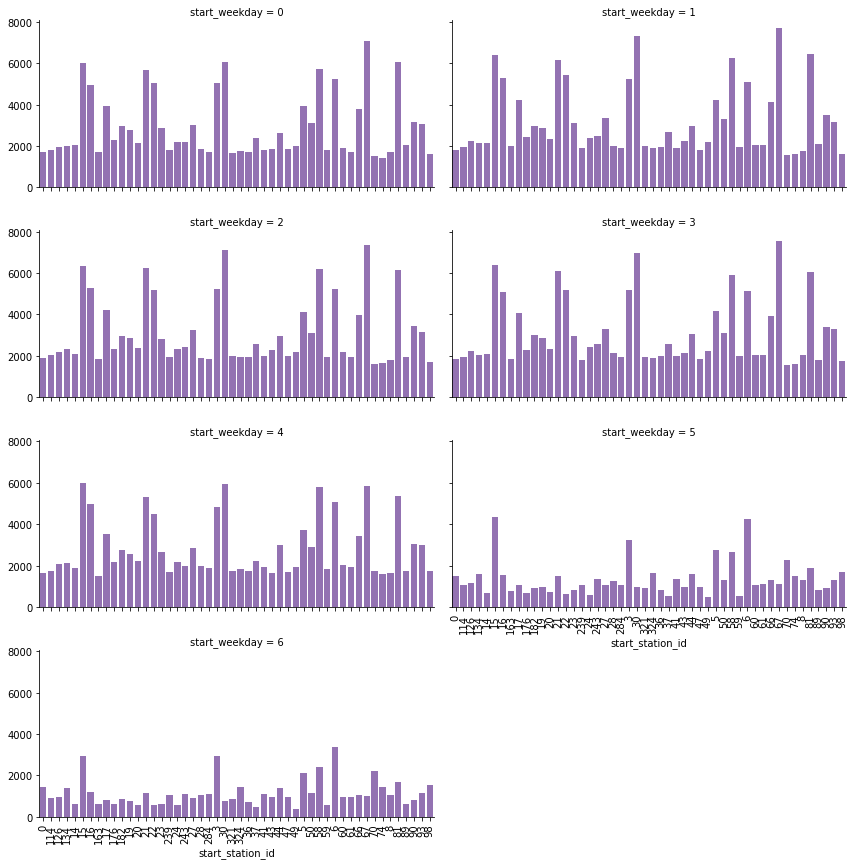

In [246]:
#7. number of rides per station by weekday
plt.figure(figsize=[25,5])
g = sb.FacetGrid(data=df1[df1['start_station_id'].isin(top50stations)], col='start_weekday', col_wrap=2, aspect=2)
g.map(sb.countplot, 'start_station_id',  color=color)
g.set_xticklabels(rotation=90)

**Preliminary Take Aways**

> Rides by station over start day 
1. There are fewer total rides on the weekends, as previous figures also indicate. Notably there is also temporal variability in rides by station. Stations that are used many times during working days are used infrequently to other stations on the weekend. 

**Next Steps:**
Explore the number of rides per station by start hour to identify which stations are being used most for commuting.  



/Users/elizabethherdter/anaconda3/lib/python2.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1800x360 with 0 Axes>

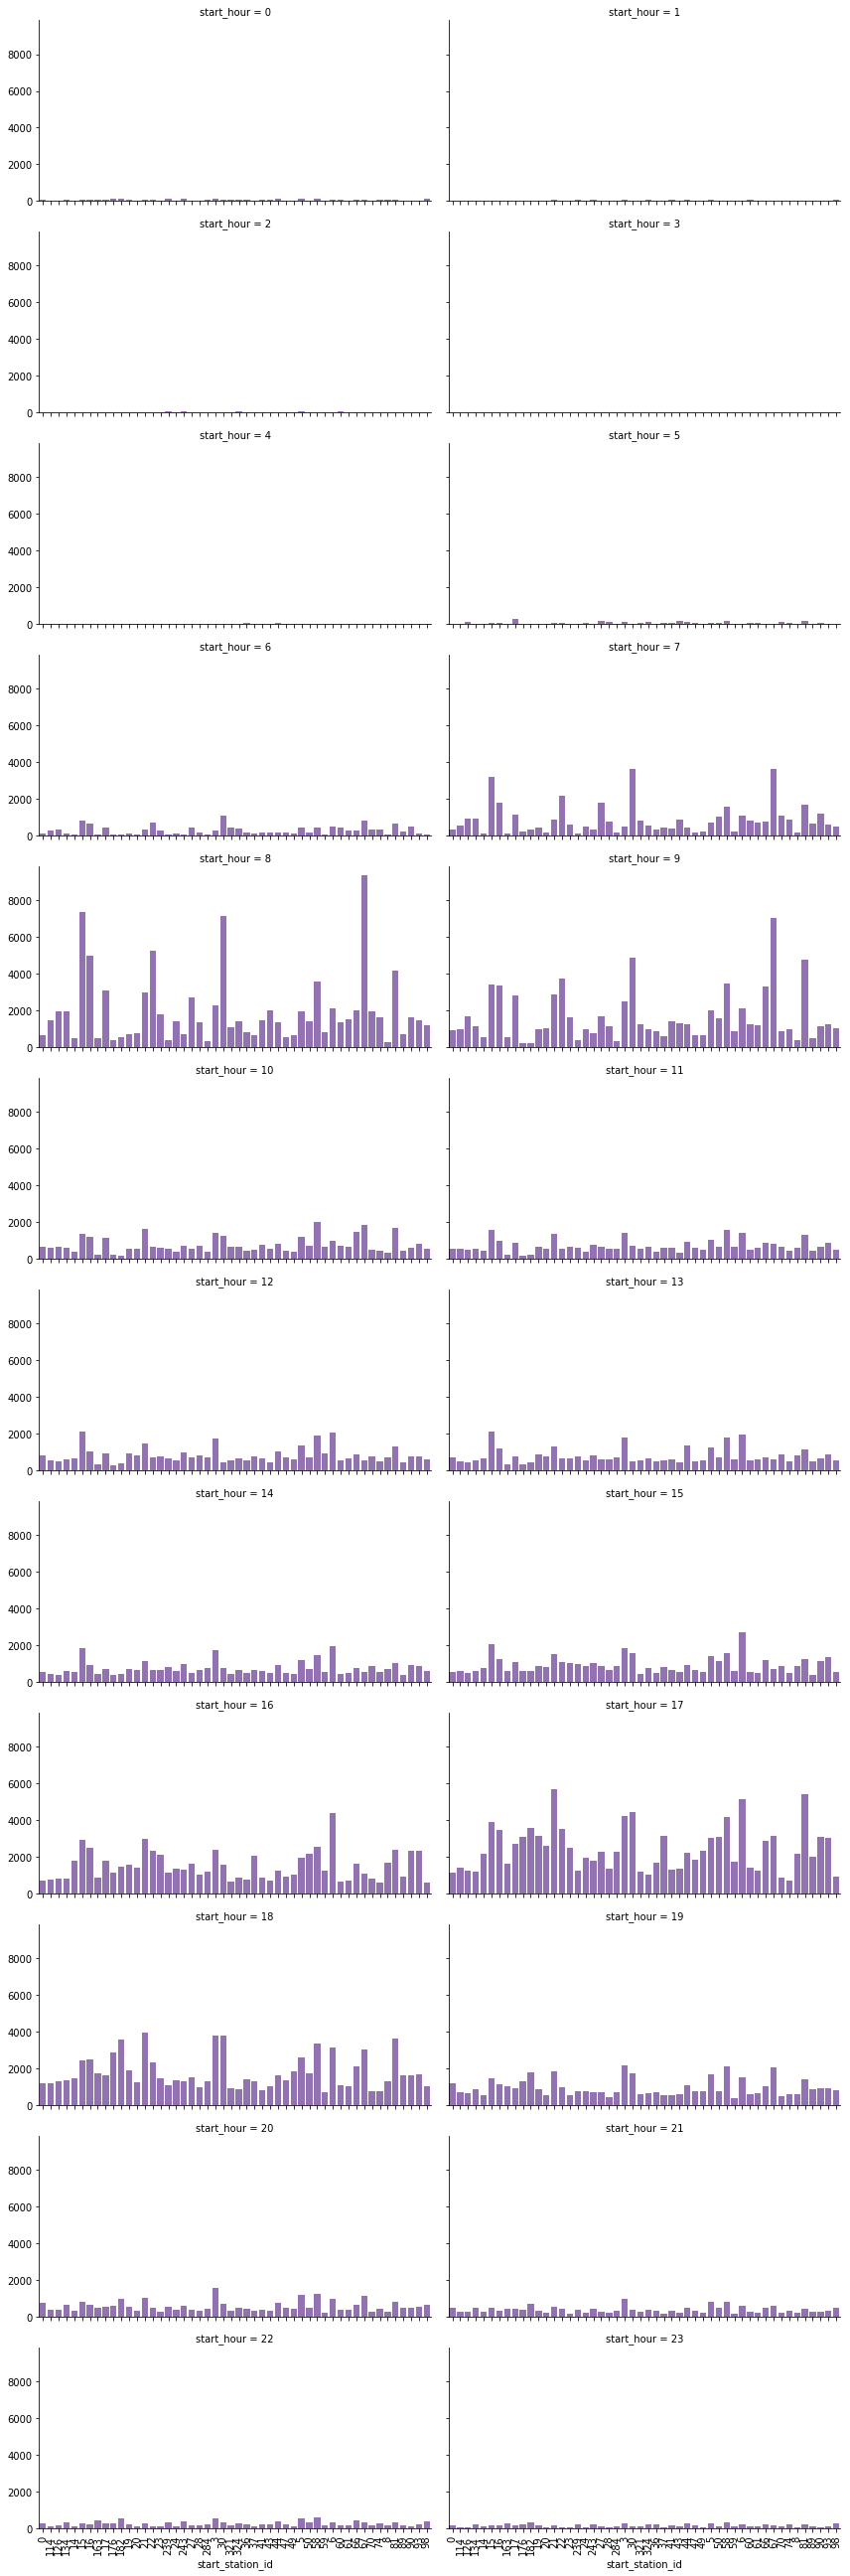

In [247]:
#8. number of rides per station by start hour
plt.figure(figsize=[25,5])
g = sb.FacetGrid(data=df1[df1['start_station_id'].isin(top50stations)], col='start_hour', col_wrap=2, aspect=2)
g.map(sb.countplot, 'start_station_id', color=color)
g.set_xticklabels(rotation=90)

**Preliminary Take Aways**

> Rides per station by start hour  
1. It is very apparent that certain stations are being relied on heavily for commuting with marked spikes during 7-9AM, noon, and 4-6PM. I'm not sure I really like the way the data are being presented in this particular format. This may not be the best figure to use in a presentation. 

**Next Steps:**
1. Explore low-use stations. 

2. Multivariate visualization. Dig into station utilization by exploring total rides per start station by starting hour and the day of the week. 

3. Multivariate visualizations. Also, explore station utilization by exploring total rides associted with ending stations by ending hour and day of the week. 


### Station Ride Rate - Infrequently Used Station Rates

In [36]:
#6. number of rides per station by month
low_stations= df1.start_station_id.value_counts().index[275:]


/Users/elizabethherdter/anaconda3/lib/python2.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1800x360 with 0 Axes>

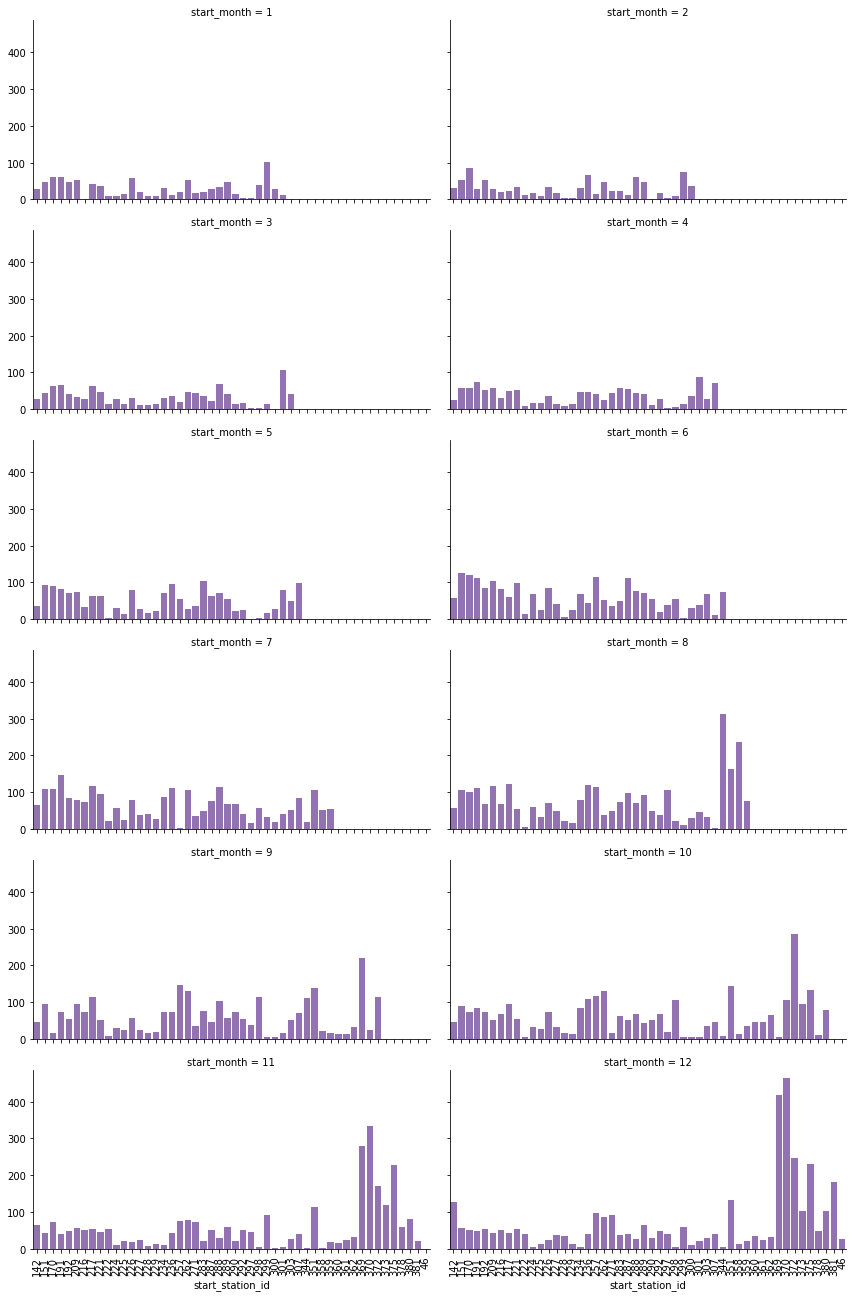

In [248]:
plt.figure(figsize=[25,5])
g = sb.FacetGrid(data=df1[df1['start_station_id'].isin(low_stations)], col='start_month', col_wrap=2, aspect=2)
g.map(sb.countplot, 'start_station_id', color=color)
g.set_xticklabels(rotation=90)

**Preliminary Take Aways**

> Rides per station by start month
1. Among lowest used stations there is a very evident temporal variation in usage. Many stations which are not used during January and February are used much more frequently in the mid to late summer. This may be just because the stations were added later on in the year. Still, it's very apparent that some stations are being used so infrequently that it may be better to eliminate the stations. For example, some stations were used less than 50 times per month which is rough utilization rate of 1.5 rides per day. 

**Next Steps**: Explore the ridershop on the weekdays. 

/Users/elizabethherdter/anaconda3/lib/python2.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1800x360 with 0 Axes>

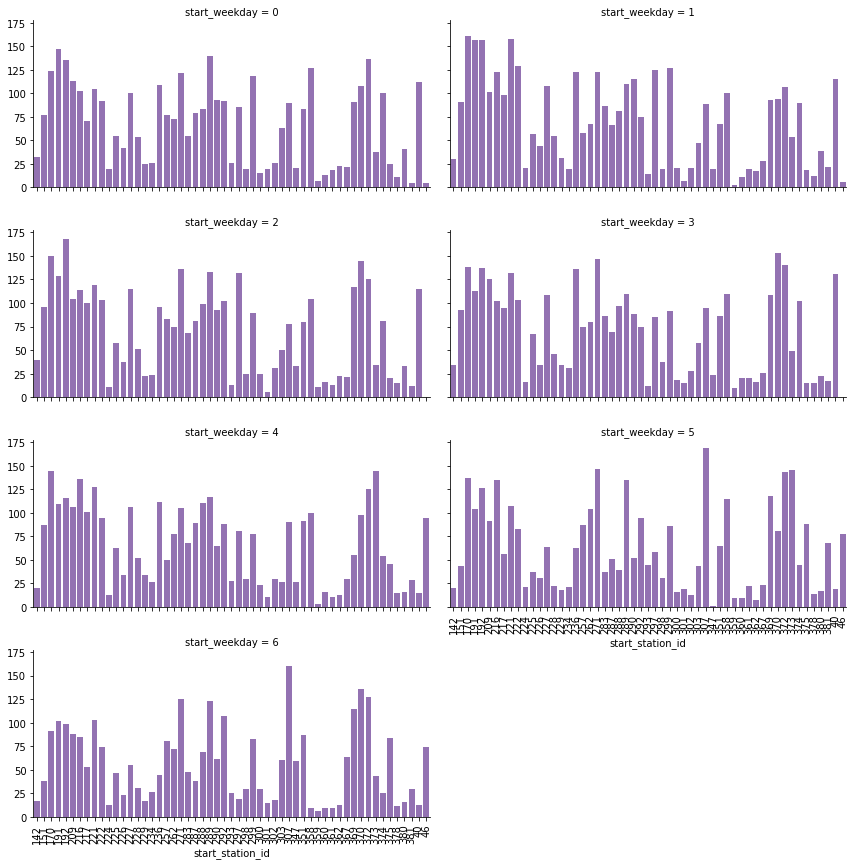

In [250]:
#7. number of rides per station by weekday
plt.figure(figsize=[25,5])
g = sb.FacetGrid(data=df1[df1['start_station_id'].isin(low_stations)], col='start_weekday', col_wrap=2, aspect=2)
g.map(sb.countplot, 'start_station_id', color=color)
g.set_xticklabels(rotation=90)

**Preliminary Take Aways**

> Rides per station by start weekday
1. Usage by start weekday in these lowest used stations varies temporally, slightly, but not nearly as starkly as by month. There are some stations that are used much more frequently during the weekday and a select few that are used a long on the weekend. There are a handful of rides from these bike stations that were used less than 25 times a day and some closer to only 10 times a day. Again, ridership rates drop on the weekend.  



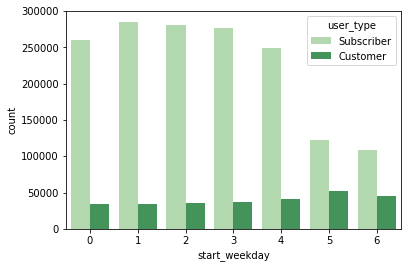

In [254]:
#9. Weekday ridership rates by user_type for week
g = sb.countplot(data=df1, x='start_weekday', hue='user_type', palette="Greens")


**Preliminary Take Aways**

> Ridership rates by user type for weekday
Overall, subsribers constitute the larges portion of usership across all days. It is apparent though that the usership rate 
for customers increases on the weekends. Usage rates by customers is greatest on the weekends, Saturday in particular. 

**Next Steps:** I'd like to explore station usage. Are there some stations that are used more by customers than subscribers? I will look into the top50 stations and the lowest use stations. 

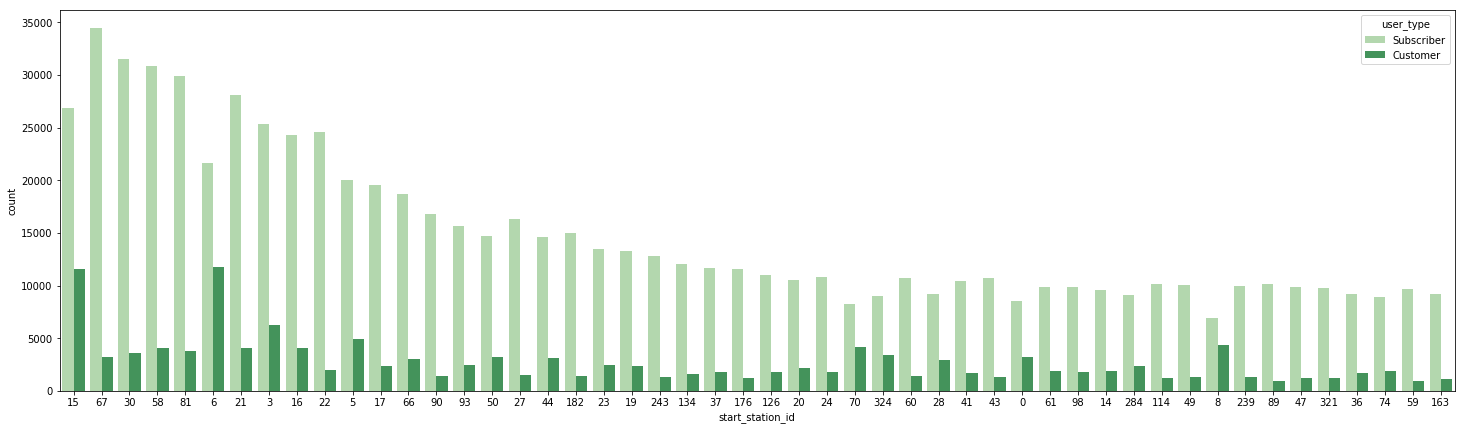

In [255]:
#9B. Station ridership rates by user type for the Top 50 stations. 
plt.figure(figsize=[25,7])
g = sb.countplot(data=df1[df1['start_station_id'].isin(top50stations)], x='start_station_id', hue='user_type', palette="Greens", order=top50stations)

#data=df1[df1['start_station_id'].isin(top50stations)]

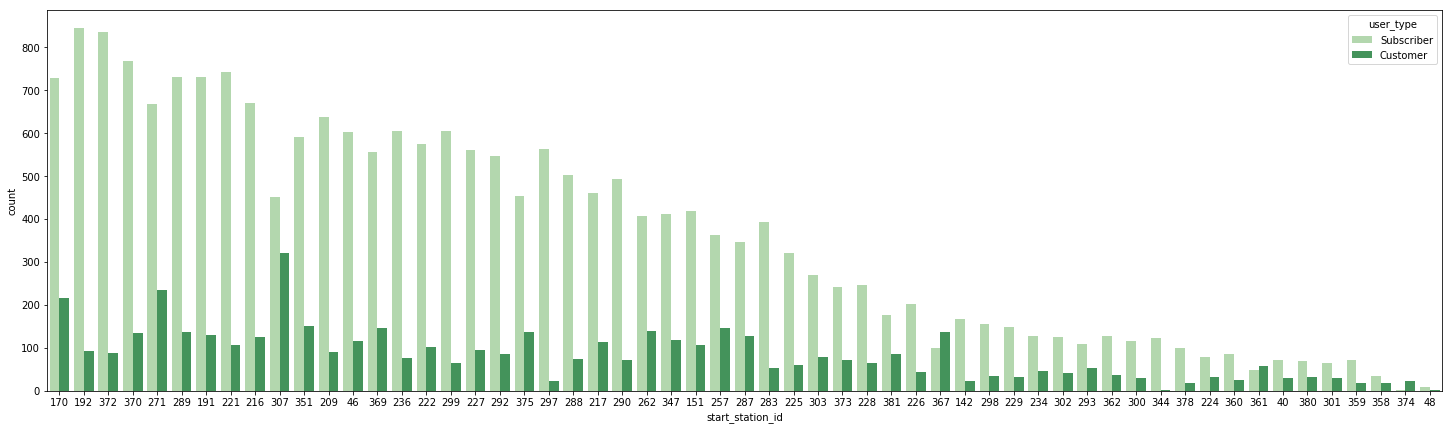

In [256]:
#9C. Station ridership rates by user type for the lowest use stations. 
plt.figure(figsize=[25,7])
g = sb.countplot(data=df1[df1['start_station_id'].isin(low_stations)], x='start_station_id', palette="Greens", hue='user_type', order=low_stations)



**Preliminary Take Aways**

For both the top50 used stations and the lowest use stations nearly every station is utilized more by subscribers except for stations 367, 361, and 374 where customers made more rides from that subscribers. It is clear however that there are a handful of stations where the customer:subscriber usage rate is higher than many others. Among top50 used stations, stations 15 and 6 have the greatest usage rate of customers. Among the lowest use stations, station 272 and 307 are frequently used by customers also. These stations are likely landmarks


## Multivariate Exploration


**Multivariate**

Stations used most for commuting:  
1. Number of rides per start_station by start hour (7-9 AM)(5-7PM), day of week (work week), and user type. 

Ride duration by start hour and weekday 
1. Explore average duration by start hour and weekday to explore the notion that people may be more leisurely with their rides on the weekend or on the weekends when they may be out taking part in nightlife. This may help explain the greater variability in ride time during the early morning hours.  

Most frequent start and stop station (what is the path most traveled):
1. during the week
2. during the weekend

Which stations could be phased out during a portion of the year? 
1. Of the least used stations- which days of the week and months are they not ever used? 




/Users/elizabethherdter/anaconda3/lib/python2.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


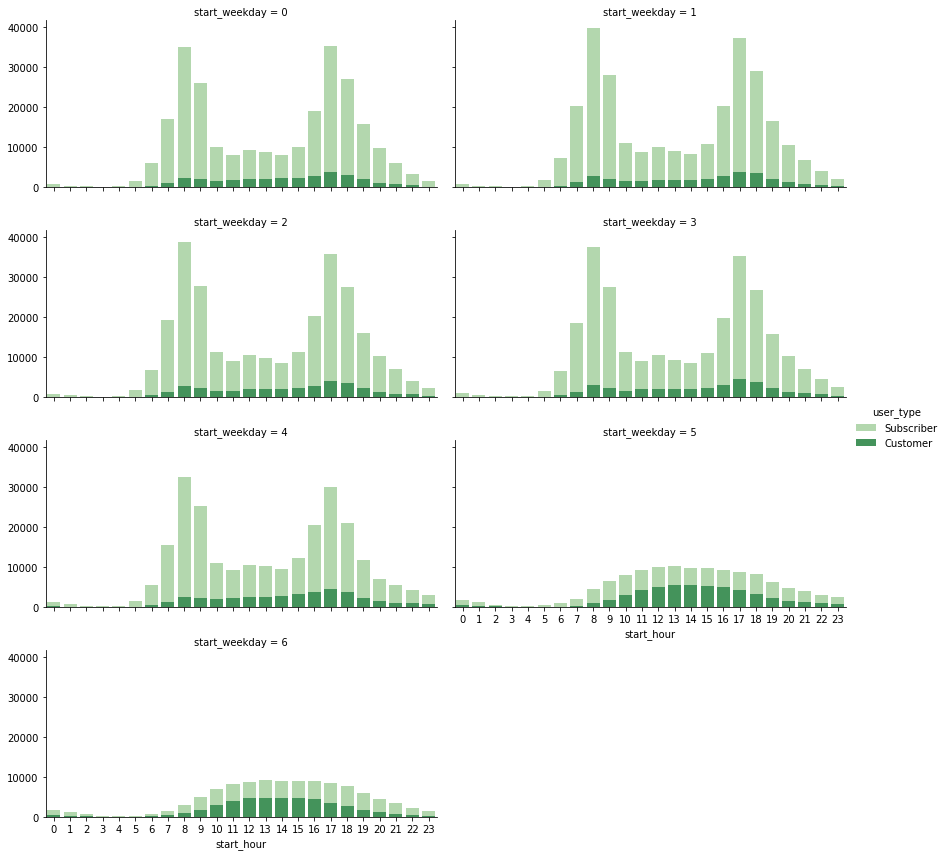

In [257]:
g = sb.FacetGrid(data=df1, col='start_weekday', hue='user_type', col_wrap=2,aspect=2, legend_out=True, palette='Greens')
g.map(sb.countplot, 'start_hour')
g.add_legend()

**Preliminary Take Aways**

On no day during the week are customers using the bikes more than the subscribers. It is clear that usage is dominated by subscribers. Notably however, hourly usage rate between subscribers and customers follows a similar relative patterns. There are two general peaks during weekday (Monday-Friday) commuting hours  for both subscriber and customers and then ridership rates decline on the weekend. Weekend ridership rates peak around noon-2pm for both subscribers and customers. 


### Average duration 

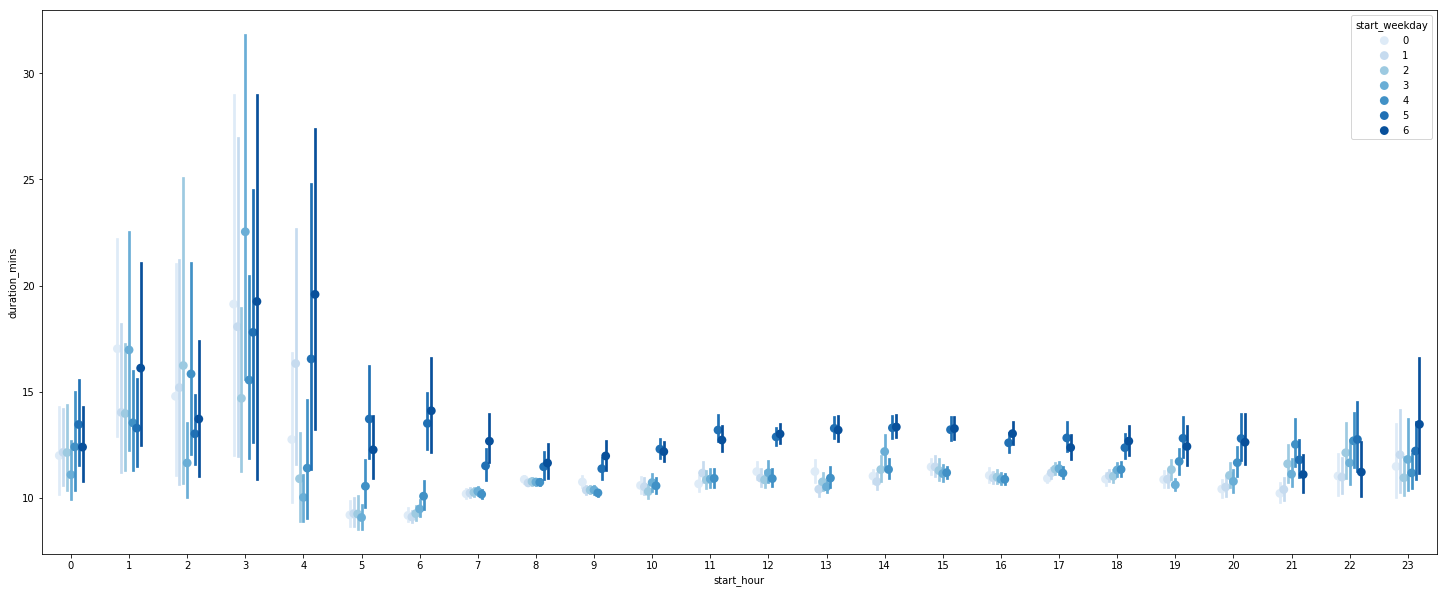

In [258]:
fig = plt.figure(figsize = [25,10])
g= sb.pointplot(data=df1[df1['user_type']=='Subscriber'], x='start_hour', y='duration_mins', hue='start_weekday', linestyles = '', dodge = 0.4, 
               palette ='Blues')

<Figure size 1800x720 with 0 Axes>

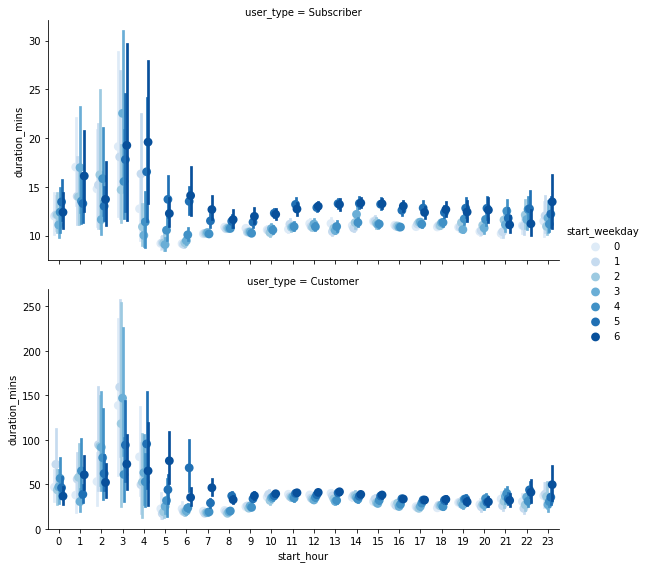

In [259]:
fig = plt.figure(figsize = [25,10])
g = sb.catplot(x="start_hour", y="duration_mins",
                 hue="start_weekday", row="user_type",
                 data=df1, kind="point",linestyles = '',
                dodge = 0.4,
                 height=4, aspect=2, palette ='Blues', sharey=False);

**Preliminary Take Aways**

These two plots are so interesting to me and I think they say a lot about ride duration. For subscribers, ride duration stays around the 10 minute to 15 minute mark for almost every hour of each day. There is a small peak in the early morning hours for every day where average ride duration increses closer to 20 minutes. Also, ride duration towards the end of the week (days 5 and 6) is generally just a smidge longer than what it is during the early portion of the week. 

For customers, ride duration rates is quite different. On average, ride duration is much longer; closer to 50 minutes. In addition, ride duration varies with start hour. Customers generally have much longer rides during the moring hours (around 2 and 3 am) no matter what day during the week. For hours 7AM to 10 PM (22), generally ride duration is longer when its a weekend (Saturday night) as compared to during the working week day. 

### Most frequently traveled path

In [ ]:
#remove na from start_station_id and then remove any na from end_station_id
df1_red = df1.dropna(subset=['start_station_id', 'end_station_id'])
df1_red.end_station_id.value_counts()

In [190]:
#select top 25 most start _station
top25= df1.start_station_id.value_counts().index[:24]
alltop = df1_red[df1_red['start_station_id'].isin(top25)]


In [191]:
station_count= alltop.groupby(['start_station_id','end_station_id']).size().reset_index().rename(columns={0:'count'})
#station_count[station_count['start_station_id']=='15']

In [192]:
#for display purposes trim at count
station_count = station_count[station_count['count'] > 1500]

In [193]:

station_count = station_count.pivot('start_station_id','end_station_id', 'count')

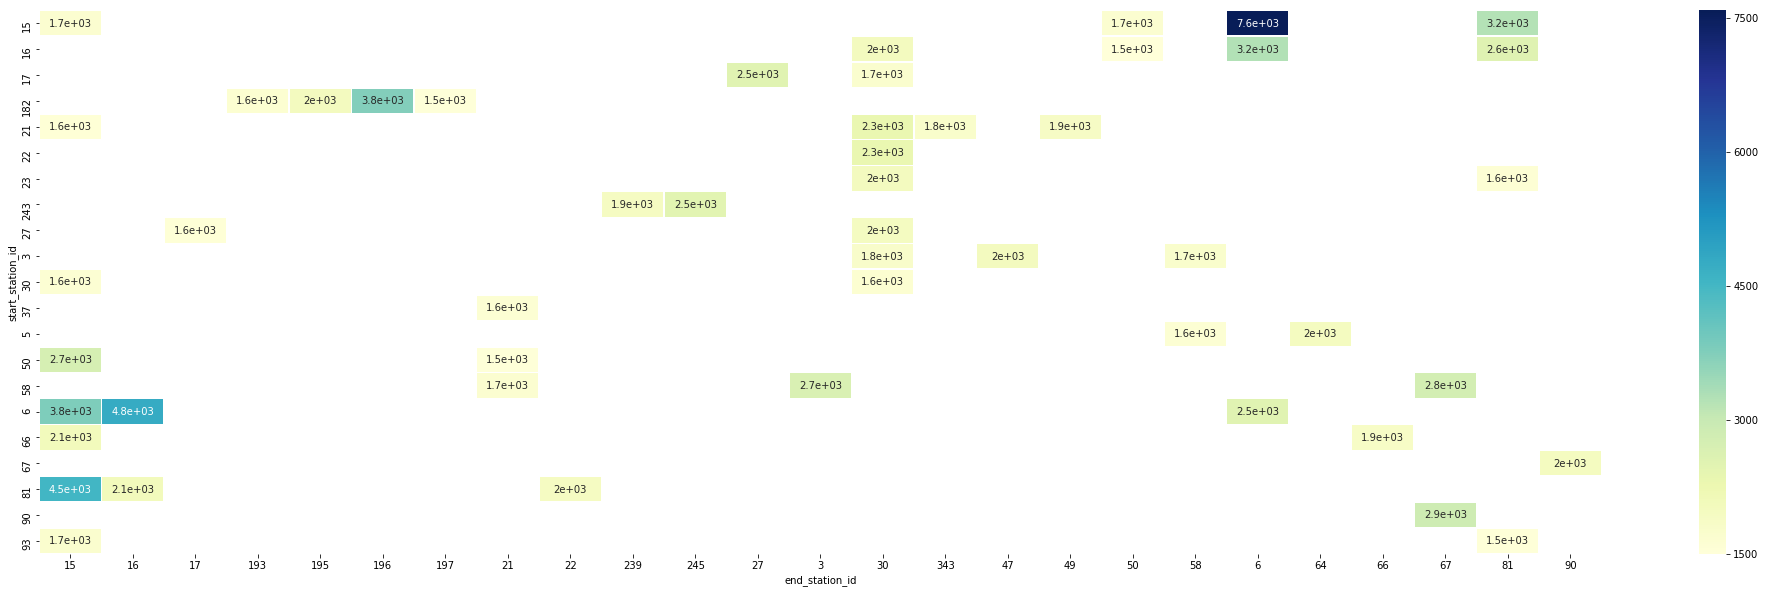

In [201]:
#where rides starting at the top25 used stations end up more than 1500 total times
plt.figure(figsize=[35,10])
ax = sb.heatmap(station_count,vmin=1500, cmap="YlGnBu",annot=True, linewidths=.5)


In [211]:
#determine station id names to determine a descriptive route:
start_station = ['15','6','81','182']
df1[df1['start_station_id'].isin(start_station)][['start_station_id','start_station_name']].drop_duplicates()

start_station_id                                 start_station_name
1                  6                      The Embarcadero at Sansome St
83                81                                 Berry St at 4th St
162              182                           19th Street BART Station
306               15  San Francisco Ferry Building (Harry Bridges Pl...

In [212]:
end_station = ['6','16', '15', '196']
df1[df1['start_station_id'].isin(end_station)][['start_station_id','start_station_name']].drop_duplicates()

start_station_id                                 start_station_name
1                  6                      The Embarcadero at Sansome St
102              196                            Grand Ave at Perkins St
198               16                            Steuart St at Market St
306               15  San Francisco Ferry Building (Harry Bridges Pl...

**Preliminary Take Aways**

The top 5 most frequently traveled paths are (from station, to station):  

15,6   (San Francisco Ferry Building -> The Embarcadero at Sansome St)  
6,16   (The Embarcadero at Sansome St -> Steuart St at Market St)    
81,15  (Berry St at 4th St -> San Francisco Ferry Building)    
182,196  (19th Street BART -> Grand Ave at Perkins St)    
6,15   (The Embarcadero at Sansome St -> San Fran Ferry Building)    

This is really neat information to have when determining how many bike and storage racks to have at each station. 


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This was a really interesting analysis. It appears that start hour and day of the week really influence ridership rates. As well, it appears that this bike share has a very large subscriber base that is utilizing the bikes mostly during commuting times. Customers follow similar patterns as subscribers do but generally the ride duration is longer especially on the weekend time when average ride duration was close to 100 minutes. It was really useful separating out the subscriber type to explore ride duration patterns. It was also really important to view the data at a weekday resolution. This helped to uncover the variability in usage patterns that wasn't visible at a monthly level. 

### Were there any interesting or surprising interactions between features?

> The most surprising feature of this dataset is that so many people use the bikes for commuting. I live in a city with a small bike share but from personal experience and watching other people use the bikes it seems they are used most for touristy things on the weekend. I don't see many people using them during the work week. It was very interesting to plot the path most traveled. Most frequently people are making a trip to and from the Ferry Building to the Embarcadero. 